In [1]:
# import required packages

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time
%matplotlib inline

In [2]:
# get our image by opencv
image = cv2.imread("VAN.jpeg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (240, 240), interpolation = cv2.INTER_AREA)

In [3]:
image.shape

(240, 240)

## Part 1: Vectorized Operations


Algorithmic efficiency is a critical component in the application of computer vision. Efficient code takes advantage of Numpy’s vectorized operations, which perform on blocks of data at the time, rather than on individual elements. This is done by delegating the actual manipulation of the arrays to optimized, pre- compiled code written in a low-level language such as C. See, e.g., Python Like You Mean It for more detail.
In this part, you will learn to use Numpy to develop efficient Python code for the following basic image processing operations.
1. Histogram equalization. Write a Python function called histEq that given an image, as a Numpy ND-array, applies histogram equalization (textbook, page 44) and returns the filtered image.
2. Adaptive histogram equalization. (Grad Only) Write a Python function called adaptiveHistEq that implements the adaptive histogram equalization method. Alternatively, you can implement the contrast-limited adaptive histogram equalization (CLHE) method. Wikipedia provides good informa- tion and a list of references.
3. Convolution with 3 × 3 and 5 × 5 filters. Write a Python function called conv that given an image and a 3 × 3 or a 5 × 5 filter, applies convolution (textbook, page 47-48) to filter the image with the given filter and returns a filtered image.

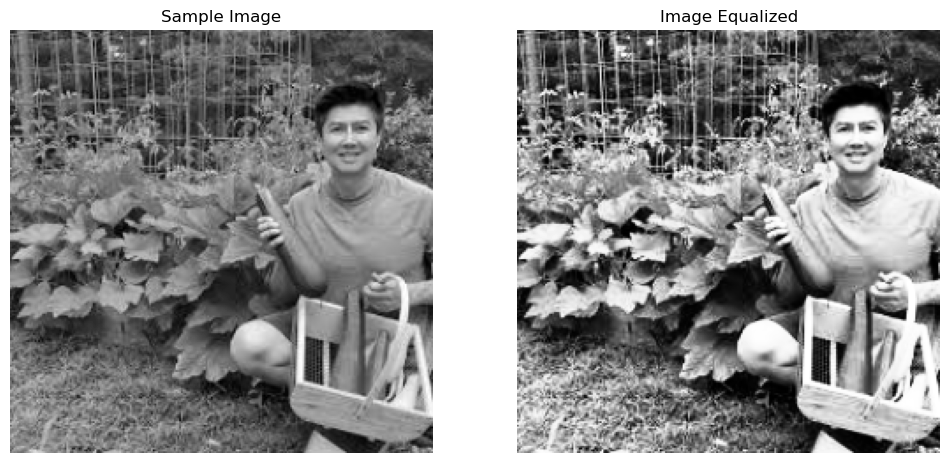

Total runtime for function (s):  0.00304412841796875


In [22]:
# Histogram Equalization
def histEq(image):
  '''
  Perform histogram equalization on input image
    
  Parameters:
      image: 2D array representing the grayscale image.
  
  Returns:
      np.array: 2D array representing the histogram equalized image.
  '''
  
  # Part 1: get the shape of the greyscale image
  img = image.astype(np.float32)
  (nrow,ncol) = img.shape

  # Part 2: Compute the histogram of the image
  hist,bin = np.histogram(image.flatten(), 256, [0, 256])
  # find the cumulative distribution function with cumsum() method
  cdf = np.cumsum(hist)

  # Part 3: Perform the equalization
  c = nrow*ncol / 255.0 # need to be float here, or integer division
  equal_hist = (1/c) * (cdf / cdf[-1])  # this will give us the equalized histogram

  # Part 4: Find the image
  # NOTE: this method could work, but very slow, so shift to use np.interp()
  # image_equalized = np.zeros(image.shape)
  #for i in range(nrow):
  #  for j in range(ncol):
  #    image_equalized[i, j] = equal_hist[image[i,j]] # replace the current value with equalized values

  # To speedup the computation, we use the interpolation to speedup computation
  # Flatten the image to a 1D array
  image_flattened = image.flatten()

  # Use numpy's interpolation function to map the old values to the new ones
  image_equalized_flattened = np.interp(image_flattened, np.arange(len(equal_hist)), equal_hist)

  # Reshape the equalized image back to the original shape
  image_equalized = image_equalized_flattened.reshape(image.shape)
  
  return image_equalized




# show the image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Sample Image')

t = time.time()
# Perform histogram equalization
equalized = histEq(image)
elapsed = time.time() - t

# Display the equalized image
axes[1].imshow(equalized, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Image Equalized')

# Save the figure
plt.savefig("/Users/shaozishan/Desktop/WFU Bruce/大四上/CSC391_CV/CV_HW/CS_Project_1/Part-1-Histeq.png")

plt.show()


print("Total runtime for function (s): ", elapsed)



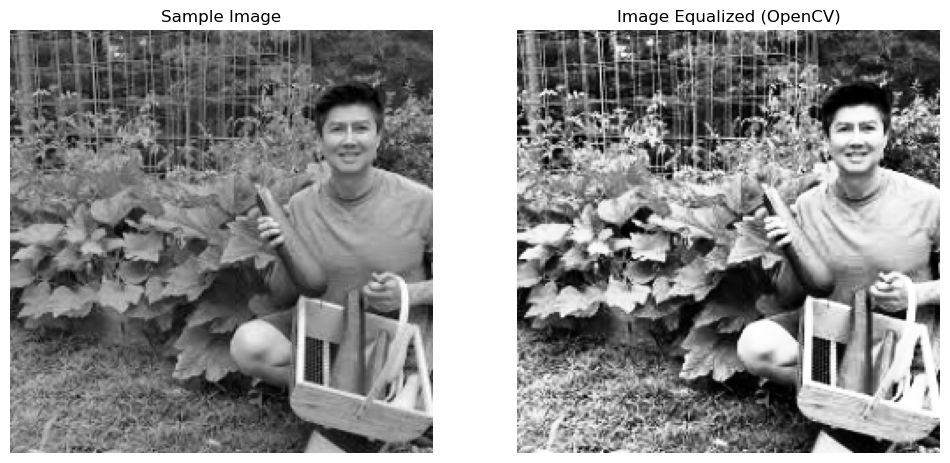

My function (s):  0.00304412841796875
Opencv function (s):  0.0003409385681152344


In [29]:
# Compares the time of the above method and opencv method
# record time for our method
t = time.time()
# Perform histogram equalization
equalized = histEq(image)
elapsed = time.time() - t

# run the opencv histogram equalization method
# Perform histogram equalization
# record the time for opencv method
t = time.time()
equalized_image = cv2.equalizeHist(image)
elapsed_op = time.time() - t


# show the image generated by the OpenCV method
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Sample Image')


# Display the equalized image
axes[1].imshow(equalized_image, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Image Equalized (OpenCV)')

plt.show()

print("My function (s): ", elapsed)
print("Opencv function (s): ", elapsed_op)

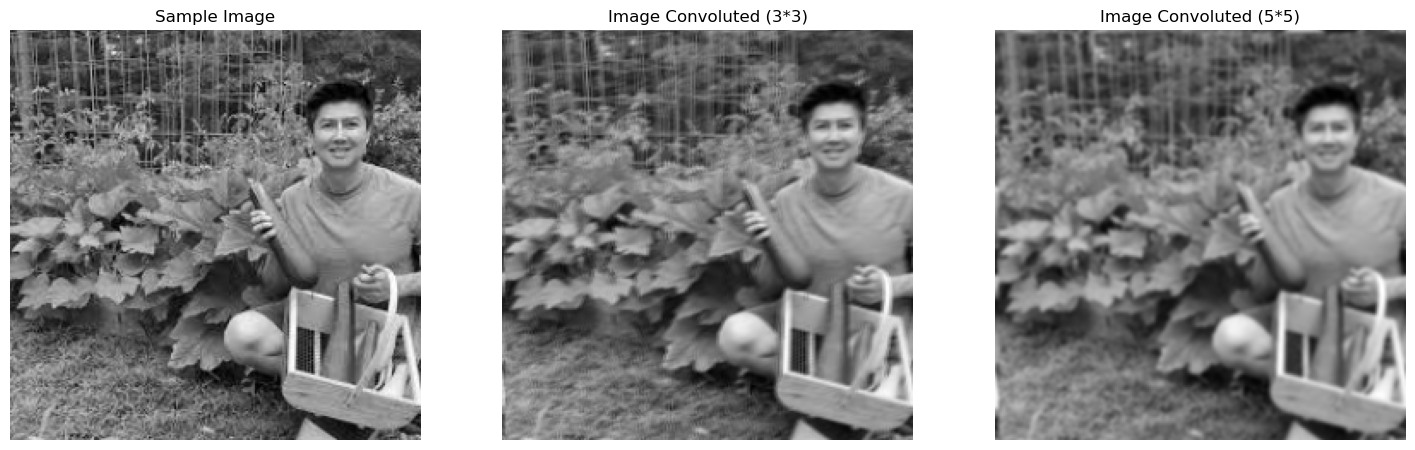


Total runtime for function (s):  0.004641056060791016


In [7]:
# Convolution Filter

# Convolution with 3 × 3 and 5 × 5 filters.
# Write a Python function called conv that given an image and a 3 × 3
# or a 5 × 5 filter, applies convolution (textbook, page 47-48) to
# filter the image with the given filter and returns a filtered image.

def conv(image, filter):
    """
    Perform 2D convolution using FFT.
    
    Parameters:
        image: 2D array representing the grayscale image.
        filter: n x n array representing the filter.
    
    Returns:
        np.array: 2D array representing the convolved image.
    """
    # turn the image to float type
    image = np.array(image).astype(np.float32)
    
    # Take FFT of the image
    image_fft = np.fft.fft2(image)
    
    # Zero pad the filter to match the image dimensions
    padded_filter = np.zeros_like(image)
    filter_shape = filter.shape
    padded_filter[:filter_shape[0], :filter_shape[1]] = filter
    
    # Take FFT of the padded filter
    filter_fft = np.fft.fft2(padded_filter)
    
    # Perform element-wise multiplication in the frequency domain
    convolved_fft = image_fft * filter_fft
    
    # Take inverse FFT to get back to the spatial domain
    convolved_img = np.fft.ifft2(convolved_fft)
    
    # Take only the real part of the inverse FFT output
    convolved_img = np.real(convolved_img)
    
    return convolved_img


# define the filter
filter1 = np.array([[1,1,4],
                  [5,1,4],
                  [0,0,0]])

filter2 = np.array([[1, 4, 6, 4, 1],
                    [4, 16, 24, 16, 4],
                    [6, 24, 36, 24, 6],
                    [4, 16, 24, 16, 4],
                    [1, 4, 6, 4, 1]
                ]) / 256.0  # gaussian blur



# show the image side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display the original image
axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Sample Image')


t = time.time()
# Perform histogram equalization
conv1 = conv(image, filter1)
conv2 = conv(image, filter2)
elapsed = time.time() - t

# Display the equalized image
axes[1].imshow(conv1, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Image Convoluted (3*3)')

# Display the equalized image
axes[2].imshow(conv2, cmap='gray')
axes[2].axis('off')
axes[2].set_title('Image Convoluted (5*5)')

# Save the figure
plt.savefig("/Users/shaozishan/Desktop/WFU Bruce/大四上/CSC391_CV/CV_HW/CS_Project_1/Part-1-Conv.png")

plt.show()

print("\nTotal runtime for function (s): ", elapsed)


In [8]:
# Version 1: conv()

# NOTE: this one is too slow, we can use fast fourier transform to speed it up
def conv_1st(image, filter):
    """
    Perform 2D convolution using FFT.
    
    Parameters:
        image: 2D array representing the grayscale image.
        filter: n x n array representing the filter.
    
    Returns:
        np.array: 2D array representing the convolved image.
    """
    # print("filtered")
    k = filter.shape[0]
    (nrow,ncol) = image.shape
    filtered_image = np.zeros(image.shape)

    # to make sure the the image was in same size as previous,
    # we need to padding the image
    pad_image = np.pad(image, (k-1, k-1))

    l1 = math.floor(k / 2)

    # by definition, each pixel is computed by It(i,j)=∑k ∑k I(i+l1−⌊k/2⌋,j+l2−⌊k/2⌋)⋅h(l1,l2)
    # we need to iterate through all pixels
    for i in range(nrow):
        for j in range(ncol):
            filtered_image[i,j] = np.sum(pad_image[i:k+i, j:k+j]*filter)

            #val = 0.0
            #for m in range(k):
            #  for p in range(k):
            #    val += pad_image[i+m-l1, j + p - l1] * filter[m,p]

            #filtered_image[i,j] = val

    return filtered_image

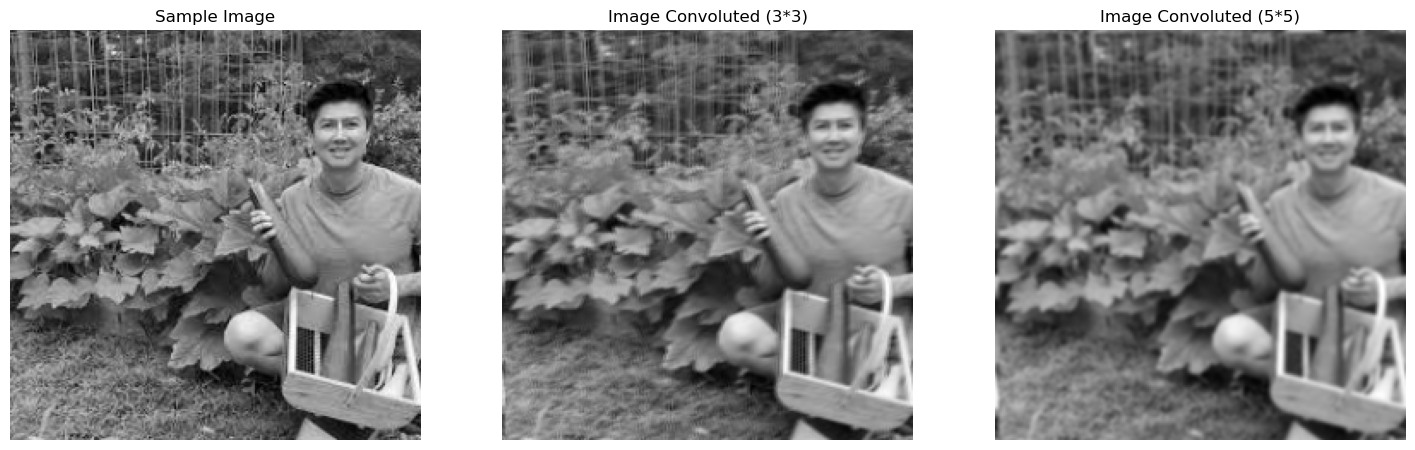

My function (s):  0.0051538944244384766
Opencv function (s):  0.0026493072509765625


In [9]:
# Compares the time of the above method and opencv method

# first to get the time of our convolution method
t = time.time()
# Perform histogram equalization
conv1 = conv(image, filter1)
conv2 = conv(image, filter2)
elapsed = time.time() - t

# run the opencv convolution method
# Perform convolution for image and filters
t = time.time()
image = image.astype('float32')  # pixels need to be floats
# Perform convolution using OpenCV
conv1_opencv = cv2.filter2D(image, -1, filter1)
conv2_opencv = cv2.filter2D(image, -1, filter2)
elapsed_op = time.time() - t


# show the image
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display the original image
axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Sample Image')

# Display the equalized image
axes[1].imshow(conv1, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Image Convoluted (3*3)')

# Display the equalized image
axes[2].imshow(conv2, cmap='gray')
axes[2].axis('off')
axes[2].set_title('Image Convoluted (5*5)')

plt.show()


print("My function (s): ", elapsed)
print("Opencv function (s): ", elapsed_op)

## Part 2: Design your own *filter*

In this part, you will use what you have learned about point and local operations on images to develop an image filter of your own. This filter is not meant for a specific task, such as edge detection. Rather, it is meant to generate a “fun” output image, similar to those obtained using apps like SnapChat.

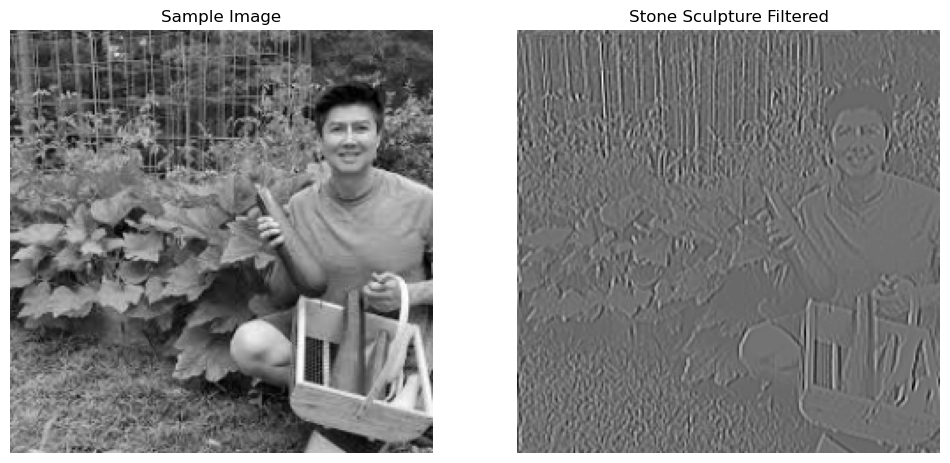

Total runtime for function (s):  0.006124973297119141


In [10]:
def stone_sculpture(image):
  '''
  Stone_sculpture, by its name, turn a grayscaled image to a marble-texture
    stone sculpture. It is done by [1] histogram equalization, [2] image 
    unsharp filter, [3] sobel filter
    
  Parameters:
      image: 2D array representing the grayscale image.
  
  Returns:
      np.array: 2D array representing the filtered image.
  '''
  
  
  (nrow,ncol) = image.shape
  filtered_image = np.zeros(image.shape)


  # perform the local operator (nonlinear scaling)
  filtered_image = histEq(image)

  # define the unsharpening filter
  unsharp = np.array([[-1, -1, -1],
                    [-1, 9, -1],
                    [-1, -1, -1]])
  filtered_image = conv(filtered_image,unsharp)

  # sobel filter makes the image looks nice
  sobel = np.array([[2,0,-1],
                    [3,0,-2],
                    [2,0,-1]])
  filtered_image = conv(filtered_image,sobel)



  return filtered_image



# show the image

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Sample Image')

t = time.time()
# Perform histogram equalization
equalized = stone_sculpture(image)
elapsed = time.time() - t

# Display the equalized image
axes[1].imshow(equalized, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Stone Sculpture Filtered')

# Save the figure
plt.savefig("/Users/shaozishan/Desktop/WFU Bruce/大四上/CSC391_CV/CV_HW/CS_Project_1/Part-2-fun_filter.png")

plt.show()

print("Total runtime for function (s): ", elapsed)



## Part 3: Video Frame Processing (10%)

It is much more interesting when image processing operations are applied on real time to video frames, rather than to an image read from a file. Efficiency of the code does play an important factor in this case.
OpenCV provides functions for capturing video frames. Basic examples for how to do this are found in this Github repository.
For this part, you will develop a simple Python application allowing real-time filtering of video frames. Your implementation should show the unfiltered and filtered frames simultaneously side by side in the same window or separately in two windows. The user should interact with the application via the keyboard, as follows:

- h - selects histogram equalization
- a - selects adaptive histogram equalization (grad case) 
- s - selects a 5 × 5 smoothing filter
- u - selects a 5×5 unsharp filter
- e - selects an edge detector filter of your choice

In [11]:
import cv2
import numpy as np

'''
This program provides a real-time interactive filter for users
It will generates two windows: Left -> Grayscale Video | Right -> Filtered Video
Users can interact with the program with keyboard
The program has following functionalities:
    - 'h' : histogram equalization
    - 's' : smoothing filter
    - 'u' : unsharpening filter
    - 'e' : edge detector
    - 'f' : fun_filter
    - 'o' : return to the original (no-filter) video frame
    - 'q' : stop and quit the program
    - 'space' : save the current filtered image to user directory
Note: Filter could not 'add up', if you type s and then h, h will cover the s
'''

   
# Initialize the video capture
cap = cv2.VideoCapture(0)  # 0 for default camera

# Fixed dimensions for the window
fixed_dim = (630, 360)

# Variable to store the current filter
current_filter = None


# Define filters
def histeq(image):
    
    # Perform histogram equalization
    image_equalized = cv2.equalizeHist(image)
    
    return image_equalized


def smooth(image):
    
    # Perform image smoothing
    kernel = np.ones((5,5), np.float32)/ 9.0
    smoothed = cv2.filter2D(image, -1, kernel)
    return cv2.GaussianBlur(image, (9,9), 0)

def unsharp(image):
    
    # Perform image unsharpening
    kernel = np.array([[-1, -1, -1],
                        [-1, 9.6, -1],
                        [-1, -1, -1]]) * 1.0
    unsharp = cv2.filter2D(image, -1, kernel)
    return unsharp


def edge_detector(image):
    
    # Perform edge detection
    edges = cv2.Canny(image, 100, 200)
    return edges


def fun_filter(image):

    # perform 
    (nrow,ncol) = image.shape
    filtered_image = np.zeros(image.shape)
    filtered_image = cv2.equalizeHist(image)

    # define the sharpening filter
    unsharp = np.array([[-1, -1, -1],
                        [-1, 9, -1],
                        [-1, -1, -1]])
    filtered_image = cv2.filter2D(filtered_image, -1, unsharp)

    # sobel filter makes the image looks nice
    sobel = np.array([[2,0,-1],
                        [3,0,-2],
                        [2,0,-1]])
    filtered_image = cv2.filter2D(filtered_image,-1, sobel)

    return filtered_image



# Create window for interactions
cv2.namedWindow('Original and Processed Frames')

save_counter = 0

# Main loop for capturing frames
while True:

    ret, frame = cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    
    # User interaction
    key = cv2.waitKey(1)
    if key == ord('h'):
        current_filter = 'histeq'
    elif key == ord('s'):
        current_filter = 'smooth'
    elif key == ord('u'):
        current_filter = 'unsharp'
    elif key == ord('e'):
        current_filter = 'edge'
    elif key == ord('f'):
        current_filter = 'fun'
    elif key == ord('o'):
        current_filter = None
    
    # Apply the current filter
    if current_filter == 'histeq':
        processed_frame = histeq(gray_frame)
    elif current_filter == 'smooth':
        processed_frame = smooth(gray_frame)
    elif current_filter == 'unsharp':
        processed_frame = unsharp(gray_frame)
    elif current_filter == 'edge':
        processed_frame = edge_detector(gray_frame)
    elif current_filter == 'fun':
        processed_frame = fun_filter(gray_frame)
    else:
        processed_frame = gray_frame


     # Resize the frames
    resized_color = cv2.resize(frame, fixed_dim, interpolation=cv2.INTER_AREA)
    resized_processed = cv2.resize(processed_frame, fixed_dim, interpolation=cv2.INTER_AREA)

    # Show the original colored and processed frames side by side
    both_frames = np.hstack((cv2.cvtColor(resized_color, cv2.COLOR_BGR2GRAY), resized_processed))
    cv2.imshow('Original and Processed Frames', both_frames)

    # Exit when 'q' is pressed
    if key == ord('q'):
        break
    
    # Save the image when 'space' is pressed
    if key == 32:  # ASCII code for space key
        filename = f"/Users/shaozishan/Desktop/WFU Bruce/大四上/CSC391_CV/CV_HW/CS_Project_1/saved_image_{save_counter}.png"
        cv2.imwrite(filename, processed_frame)
        print(f"Image saved at {filename}")
        save_counter += 1

# Release the camera and close the windows
cap.release()
cv2.destroyAllWindows()


[ WARN:0@1.611] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
